series is like dictionary and it has index and value, index may be number or name. 
but in numpy array we dont have any index, there is just a single array. 

1- MPORTING LIBRARIES AND READING FILES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime



In [3]:
transaction_data = pd.read_csv('QVI_transaction_data.csv')
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
customer_data = pd.read_csv('QVI_purchase_behaviour.csv')

2- Quick look on the transaction_data

In [5]:
# lets go through the transaction_data
# data wrangler
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [6]:

transaction_data.describe()
transaction_data.info()
transaction_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

3- FORMATTING

In [7]:
# Convert integer date to proper datetime
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], origin='1899-12-30', unit='D')


4- CHECK FOR MISSING DATES

In [8]:
# now we want to see if we have any missing dates
transactions_by_date = transaction_data.groupby('DATE').size()
transactions_by_date.describe()

count    364.000000
mean     727.571429
std       35.256836
min      648.000000
25%      706.750000
50%      724.000000
75%      744.250000
max      939.000000
dtype: float64

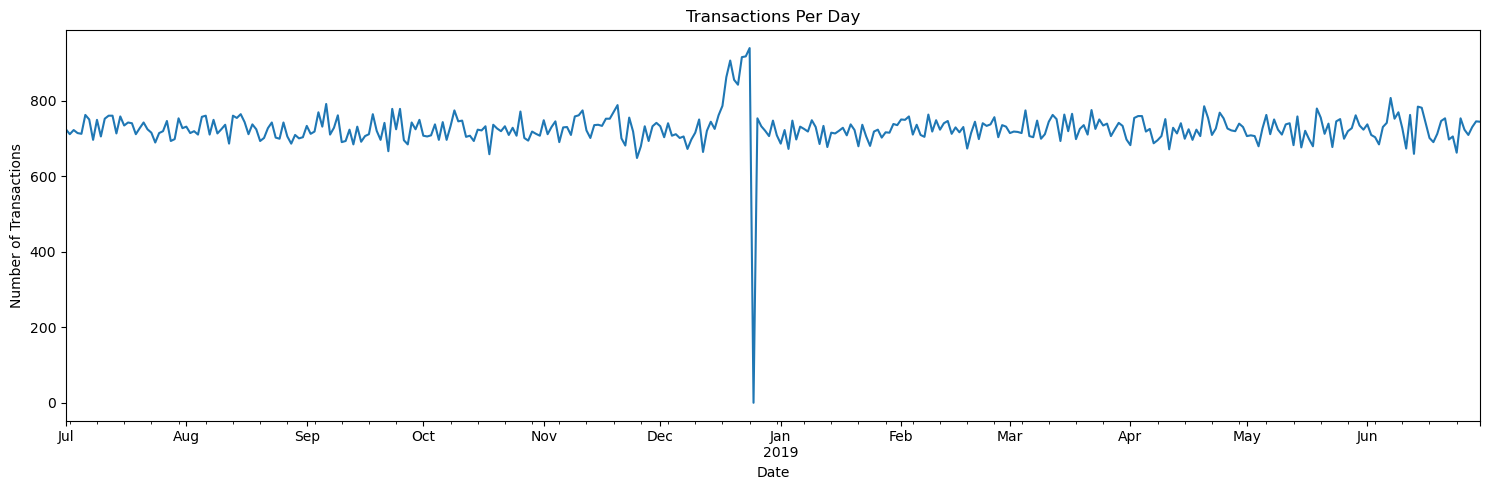

In [9]:
# we see there is 364 rows, so we plot all the dates to see the probable gap


# Create a full date range
full_date_range = pd.date_range(start='2018-07-01', end='2019-06-30')

# Reindex to include missing dates
transactions_by_date_full = transactions_by_date.reindex(full_date_range, fill_value=0)

# Plot transaction count over time
plt.figure(figsize=(15,5))
transactions_by_date_full.plot()
plt.title('Transactions Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

5- PRODUCT NAMES ANALYSIS

In [10]:
product_names = transaction_data['PROD_NAME']    # panda series
product_names = transaction_data['PROD_NAME'].unique()  # numpy array
product_names = pd.Series(product_names)   # panda series
product_names


0        Natural Chip        Compny SeaSalt175g
1                      CCs Nacho Cheese    175g
2        Smiths Crinkle Cut  Chips Chicken 170g
3        Smiths Chip Thinly  S/Cream&Onion 175g
4      Kettle Tortilla ChpsHny&Jlpno Chili 150g
                         ...                   
109       Red Rock Deli Chikn&Garlic Aioli 150g
110         RRD SR Slow Rst     Pork Belly 150g
111                    RRD Pc Sea Salt     165g
112          Smith Crinkle Cut   Bolognese 150g
113                    Doritos Salsa Mild  300g
Length: 114, dtype: object

In [11]:
product_words = " ".join(product_names).split(" ")  # List
product_words = pd.Series(product_words)   # panda series
product_words


0      Natural
1         Chip
2             
3             
4             
        ...   
818    Doritos
819      Salsa
820       Mild
821           
822       300g
Length: 823, dtype: object

In [12]:
product_words_clean = product_words[product_words.str.contains("[a-zA-Z]", regex=True) & ~product_words.str.contains(r'\d')]
product_words_clean.reset_index()



,index,0
0,0,Natural
1,1,Chip
2,9,Compny
3,11,CCs
4,12,Nacho
...,...,...
453,813,Cut
454,816,Bolognese
455,818,Doritos
456,819,Salsa


In [13]:
product_words_clean.value_counts().head(10)

Chips       21
Smiths      16
Crinkle     14
Cut         14
Kettle      13
Cheese      12
Salt        12
Original    10
Salsa        9
Chip         9
Name: count, dtype: int64

5-1- CORRECTIONS for PRODUCT NAMES

In [14]:
# Remove rows where 'salsa' appears in product name
transaction_data = transaction_data[~transaction_data['PROD_NAME'].str.lower().str.contains('salsa')]


In [15]:
# Replace 'chip' with 'chips' to unify the term
transaction_data['PROD_NAME'] = transaction_data['PROD_NAME'].str.lower().str.replace('chip ', 'chips ')


C:\Users\Amin\AppData\Local\Temp\ipykernel_26824\1586636380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_data['PROD_NAME'] = transaction_data['PROD_NAME'].str.lower().str.replace('chip ', 'chips ')


In [16]:

transaction_data


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,natural chips compny seasalt175g,2,6.0
1,2019-05-14,1,1307,348,66,ccs nacho cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,smiths chips thinly s/cream&onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,kettle tortilla chpshny&jlpno chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,kettle sweet chilli and sour cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,tostitos splash of lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,doritos mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,doritos corn chips mexican jalapeno 150g,2,7.8


In [17]:
product_names= pd.Series(transaction_data['PROD_NAME'].unique())
product_words= pd.Series(" ".join(product_names).split(" "))
product_words_clean = product_words[product_words.str.contains("[a-zA-Z]", regex=True) & ~product_words.str.contains(r'\d')]
product_words_clean.reset_index()
product_words_clean.value_counts().head(10)

chips       30
smiths      15
kettle      13
crinkle     13
cut         13
salt        12
cheese      12
original    10
rrd          8
corn         8
Name: count, dtype: int64

6- CHECK FOR OUTLIERS

In [18]:
transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


In [19]:
transaction_data # use the link below to open data wrangler in vs code
# open data wrangler to discover outliers. after observing the prod_qty column, we sort it descending and
# we see that there is just one customer had 200 umber of products and we see his loyalty number is 226000
# So we Remove outliers as that customer's transactions

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,natural chips compny seasalt175g,2,6.0
1,2019-05-14,1,1307,348,66,ccs nacho cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,smiths chips thinly s/cream&onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,kettle tortilla chpshny&jlpno chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,kettle sweet chilli and sour cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,tostitos splash of lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,doritos mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,doritos corn chips mexican jalapeno 150g,2,7.8


In [20]:

transaction_data = transaction_data[transaction_data['LYLTY_CARD_NBR'] != 226000]


In [21]:
transaction_data # use the link below to open data wrangler in vs code

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,natural chips compny seasalt175g,2,6.0
1,2019-05-14,1,1307,348,66,ccs nacho cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,smiths chips thinly s/cream&onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,kettle tortilla chpshny&jlpno chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,kettle sweet chilli and sour cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,tostitos splash of lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,doritos mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,doritos corn chips mexican jalapeno 150g,2,7.8


In [22]:
# Extract pack size
transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].str.extract(r'(\d+)').astype(float)

C:\Users\Amin\AppData\Local\Temp\ipykernel_26824\330523452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].str.extract(r'(\d+)').astype(float)


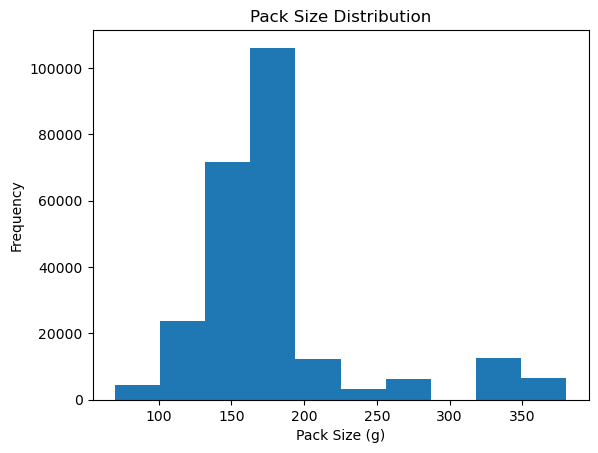

In [23]:
plt.hist(transaction_data['PACK_SIZE'], bins=10)
plt.title("Pack Size Distribution")
plt.xlabel("Pack Size (g)")
plt.ylabel("Frequency")
plt.show()

In [24]:
# Extract brand
transaction_data['BRAND'] = transaction_data['PROD_NAME'].str.split().str[0].str.upper()

C:\Users\Amin\AppData\Local\Temp\ipykernel_26824\3808866524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_data['BRAND'] = transaction_data['PROD_NAME'].str.split().str[0].str.upper()


In [25]:
# after observing the brand column, Some of the brand names look like they are of the same brands - 
# such as RED and RRD, which are both Red Rock Deli chips. Let’s combine these together.

In [26]:
# Clean up brand names
brand_corrections = {
    "RED": "RRD", "SNBTS": "SUNBITES", "INFZNS": "INFUZIONS", "WW": "WOOLWORTHS",
    "SMITH": "SMITHS", "NCC": "NATURAL", "DORITO": "DORITOS", "GRAIN": "GRNWVES"
}
transaction_data['BRAND'] = transaction_data['BRAND'].replace(brand_corrections)

C:\Users\Amin\AppData\Local\Temp\ipykernel_26824\1611709099.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_data['BRAND'] = transaction_data['BRAND'].replace(brand_corrections)


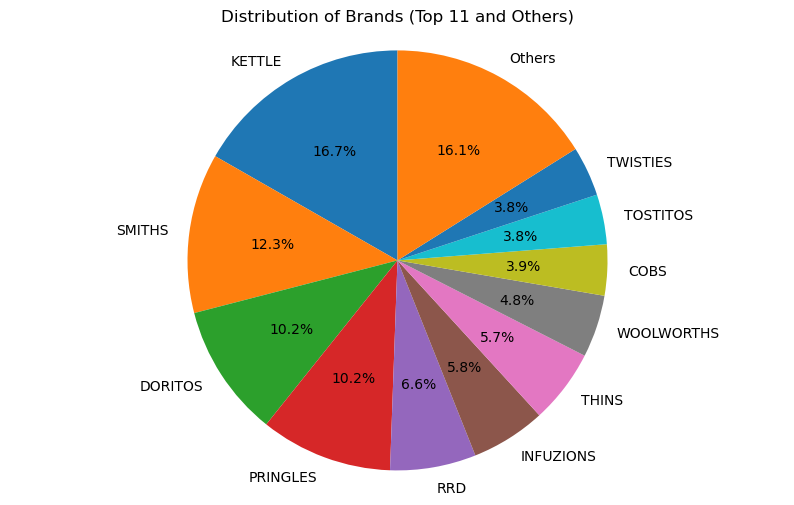

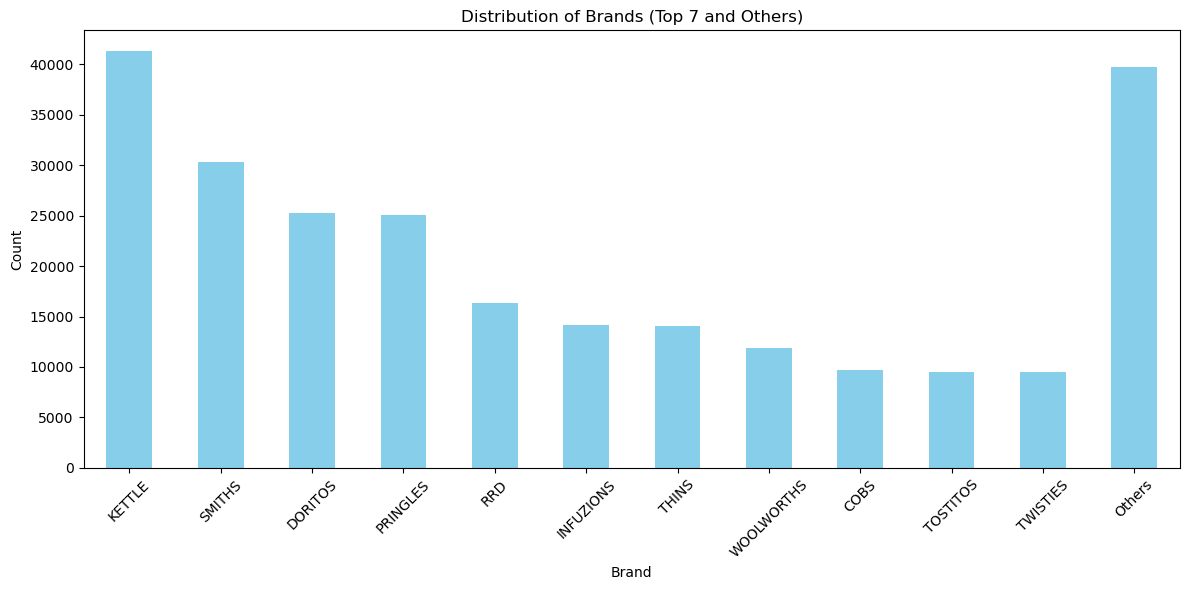

In [27]:
# Get the value counts of brands
brand_counts = transaction_data['BRAND'].value_counts()

# Get the top 5 brands
top_11_brands = brand_counts.head(11)

# Sum up the counts for all other brands
other_brands_count = brand_counts[11:].sum()

# Create a new series with top 11 and 'Others'
plot_data = pd.concat([top_11_brands, pd.Series({'Others': other_brands_count})])

# Plot pie chart
plt.figure(figsize=(10, 6))
plt.pie(plot_data, autopct='%1.1f%%',labels=plot_data.index, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Brands (Top 11 and Others)')
plt.show()

# plot bar chart
plt.figure(figsize=(12, 6))
plot_data.plot(kind='bar', color='skyblue')
plt.title('Distribution of Brands (Top 7 and Others)')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


7- Quick look on the customer_data

In [28]:
# lets go through the customer_data
# data wrangler
customer_data

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [29]:
customer_data.describe()
customer_data.info()
customer_data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

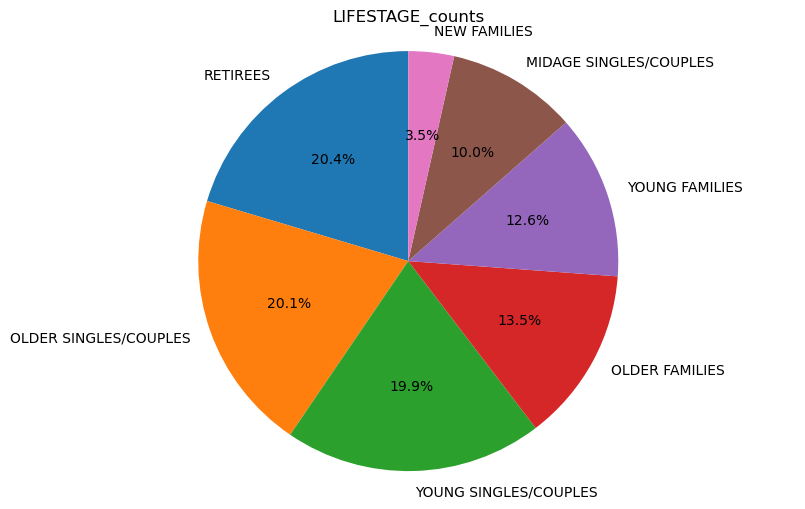

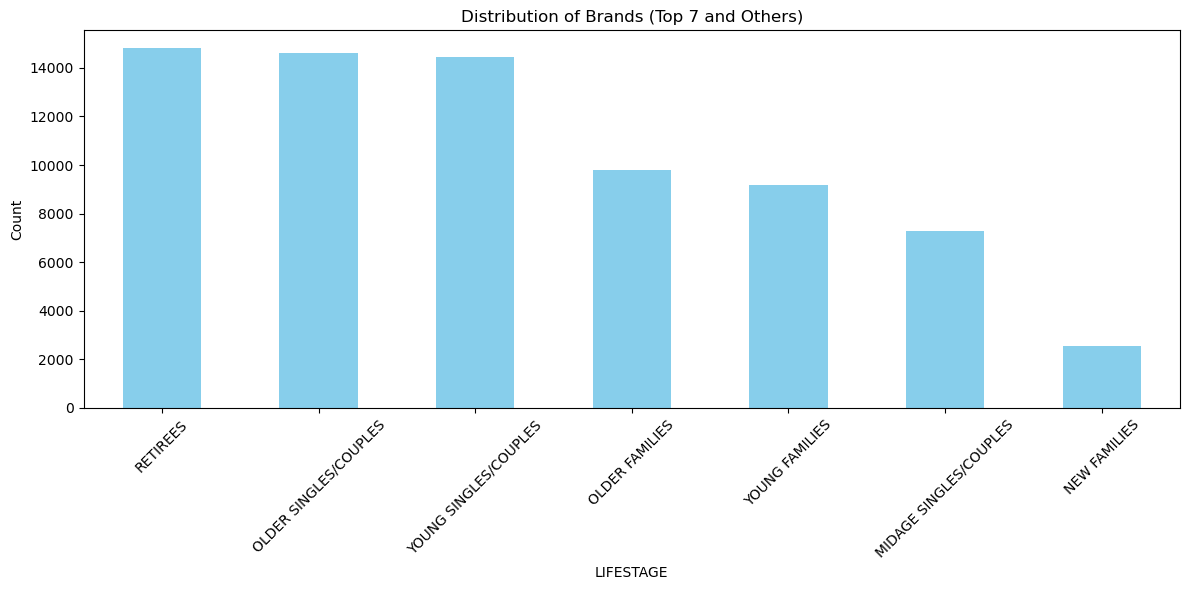

In [30]:
LIFESTAGE_counts = customer_data['LIFESTAGE'].value_counts()

# Plot pie chart
plt.figure(figsize=(10, 6))
plt.pie(LIFESTAGE_counts, autopct='%1.1f%%',labels=LIFESTAGE_counts.index, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('LIFESTAGE_counts')
plt.show()

#  plot bar chart
plt.figure(figsize=(12, 6))
LIFESTAGE_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Brands (Top 7 and Others)')
plt.xlabel('LIFESTAGE')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


8- Merge Transaction Data and Customer Data

In [36]:
mdata = pd.merge(transaction_data, customer_data, on="LYLTY_CARD_NBR", how="left")
mdata.isnull().sum()


DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [37]:
mdata.dropna(subset=['LIFESTAGE', 'PREMIUM_CUSTOMER'], inplace=True)  # delete rows that have na values in lifestage and premium customer

In [38]:
# Export the DataFrame to a CSV file
mdata.to_csv('mdata.csv', index=False)

Data exploration is now complete! EDA is done.